# An example to train a K-NN classifer on a fruit data 

## Import necessary modules and libraries

In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

## Load the fruit data

In [15]:
url = 'https://raw.githubusercontent.com/dongleiyin/Python/master/Coursera/fruit_data_with_colors.txt'
fruits=pd.read_table(url)

In [20]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


## Training and Test Split

In [27]:
x=fruits[['mass','width','height','color_score']]
y=fruits['fruit_label']

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)


## Examining and visualizing the data (for small data)

<IPython.core.display.Javascript object>


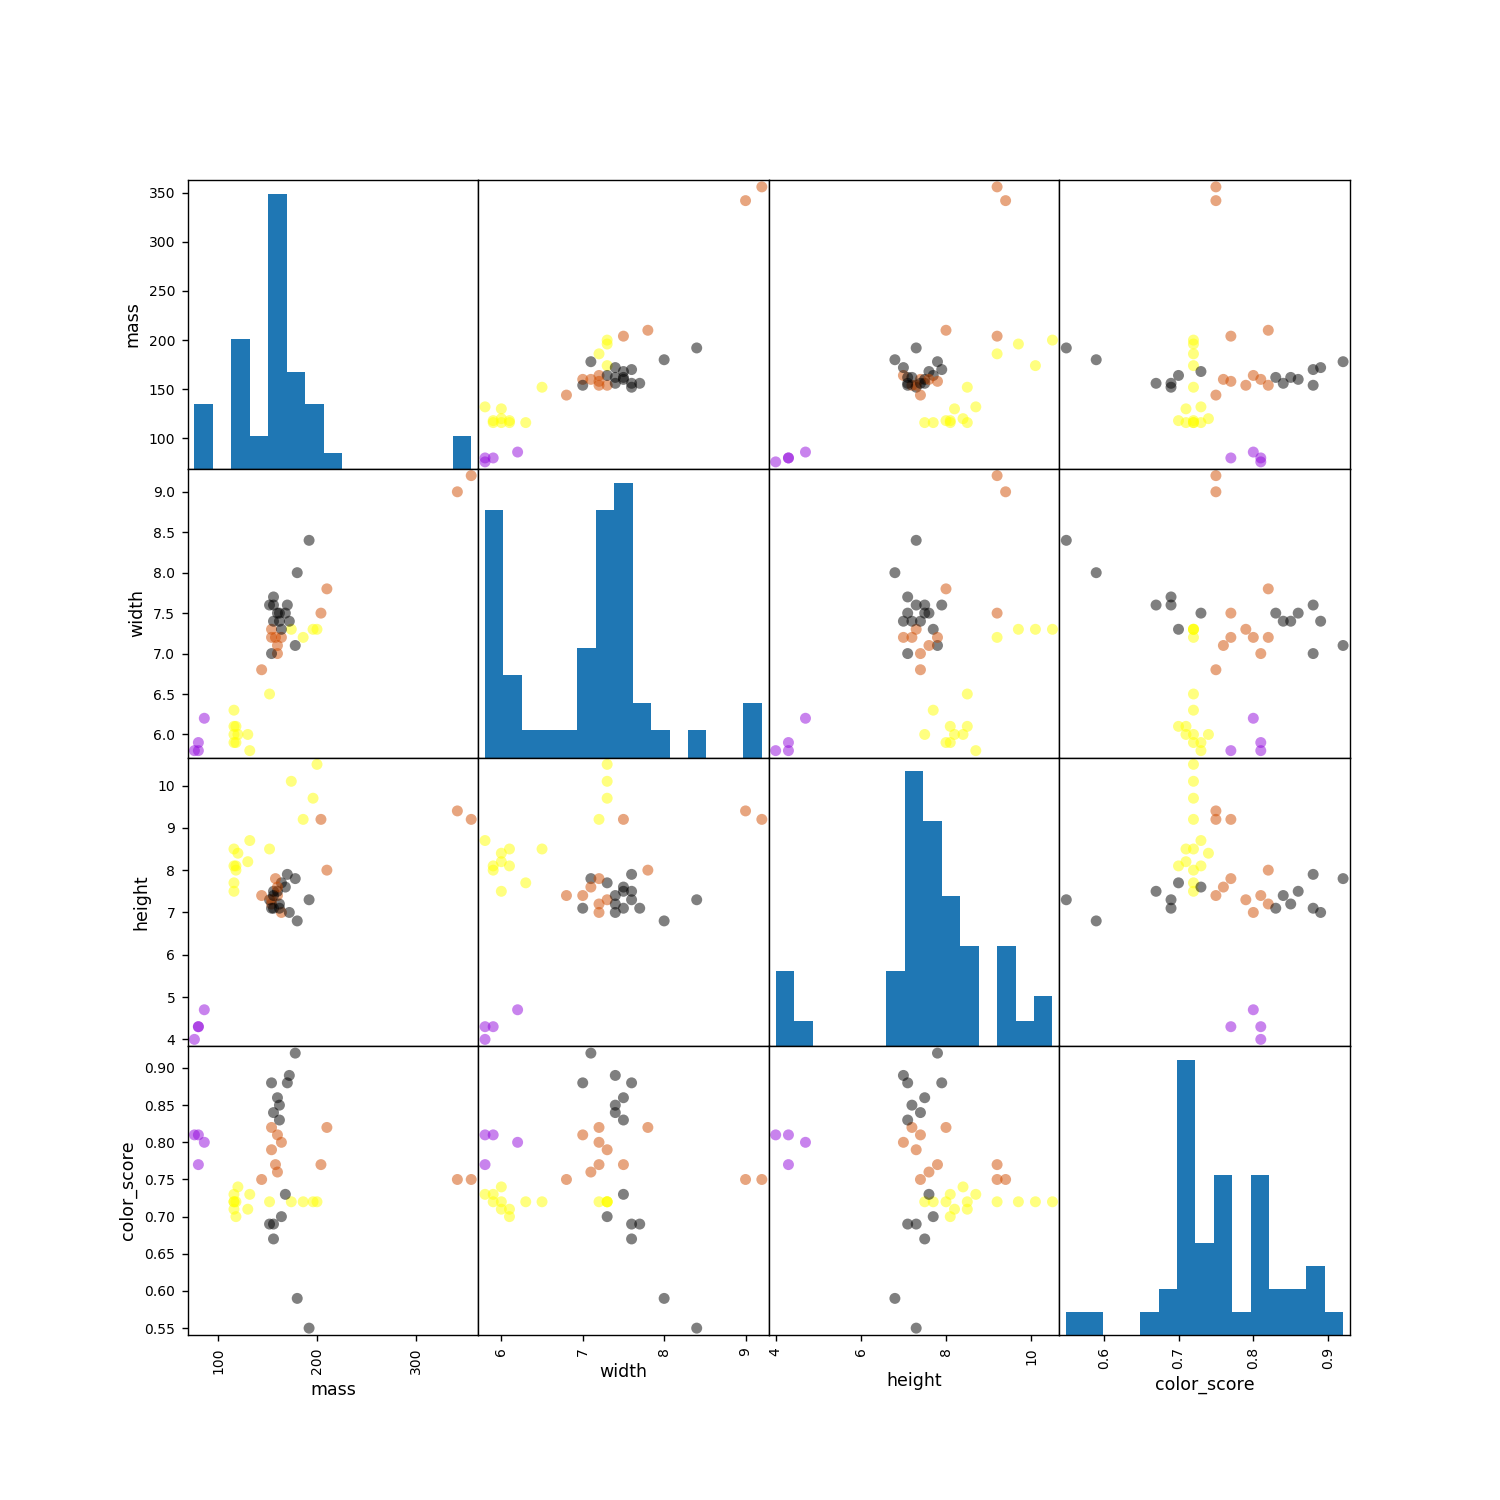

In [38]:
# Pair scatterplot: show interactions between pairwise relations between 2 features
from matplotlib import cm
cmap=cm.get_cmap('gnuplot')
scatter=pd.plotting.scatter_matrix(x_train,c=y_train,marker='o',s=40,hist_kwds={'bins':15},figsize=(12,12),cmap=cmap)


<IPython.core.display.Javascript object>


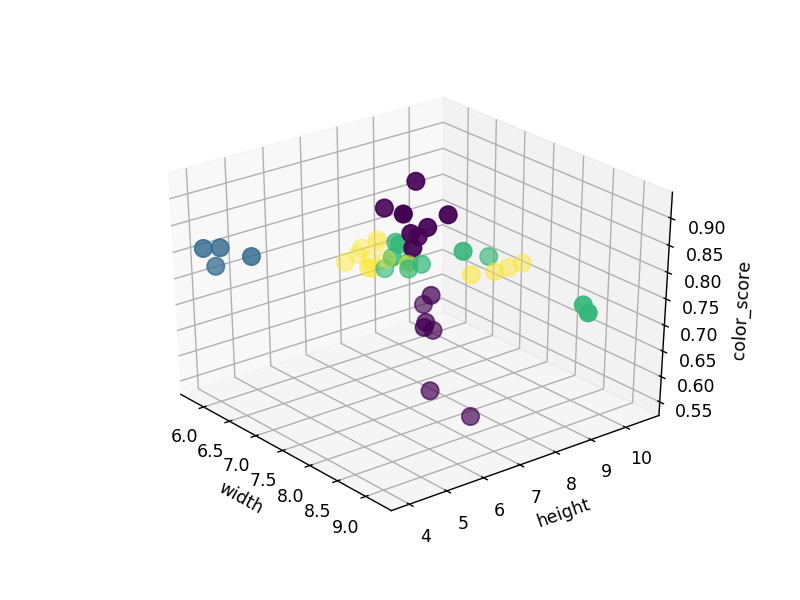

In [39]:
# 3-D plot: show interactions/pairwise relations between 3 features
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x_train['width'],x_train['height'],x_train['color_score'],c=y_train,marker='o',s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()


## K-NN(K-Nearest Neighbors) Classifer

In [ ]:
# Steps:
# 1. Find the top-k most similar instances to x_test that are in x_train 
# 2. Get the correspoding k labels for those instances in y_train
# 3. Predict the label for x_test by combining the labels, e.g., using marjority vote

# Four things to be specified:
# 1. Distance metric, e.g., Euclidean distance
# 2. Number of nearest neighbors k, e.g., k=5
# 3. Optional weighting function on the neighbor points, e.g., uniform weighting
# 4. How to aggregate/make decision, e.g., majority votes

In [43]:
# create classifier object
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

# train the classifer(fit the estimator) based on training data
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [45]:
# estimate the accuaray of the classifier on test data, e.g., accuracy
knn.score(x_test,y_test)

0.53333333333333333

In [59]:
# make prediction for new data
fruit_pred=knn.predict([[20, 4.3, 5.5, 0.7]])
fruits[fruits['fruit_label']==fruit_pred[0]]['fruit_name']

3    mandarin
4    mandarin
5    mandarin
6    mandarin
7    mandarin
Name: fruit_name, dtype: object

<IPython.core.display.Javascript object>


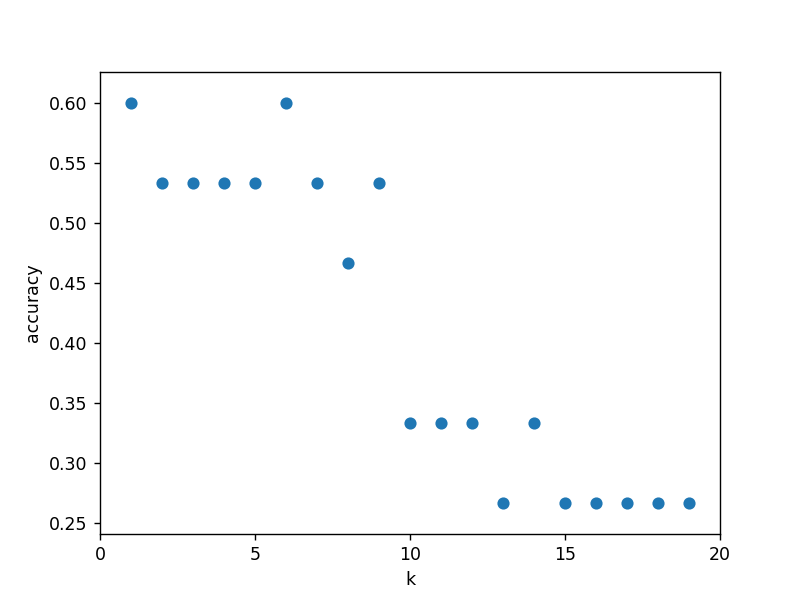

([<matplotlib.axis.XTick at 0x1bd6460dac8>,
 <a list of 5 Text xticklabel objects>)

In [65]:
# Check the k-NN classification accuracy to the choices of k
scores=[]
k_range=range(1,20)
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    scores.append(knn.score(x_test,y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range,scores)
plt.xticks([0,5,10,15,20])